## Coin Jumping Puzzle

`[2,2,2,0,1,1,1]` convert to `[1,1,1,0,2,2,2]` by some rules
1. `2` can move to right only and `1` can move to left only
2. a coin can move to the empty field (`0`) by directly or by jump over one other coin

We solve this problem with two arrays, the configuration and the solution array. The solution array contains all moves and at the last postion (`[-1]`) the next possible move depending at the moving numbers (i.e. -2,-1,1,2) which describe how the zero field can be moved.

In [2]:
import matplotlib.pyplot as plt

In [3]:
def check_solution(c):
    '''return True if a solution is found'''
    o = len(c) // 2
    for i in range (0,o):
        if c[i] != 1:
            return False
        if c[i + o + 1] != 2:
            return False
    
    return True

In [4]:
def can_move(c, m):
    '''check configuration if the move m is possible
    by checking the boundaries and the move direction for 1 and 2
    '''
    z = c.index(0)
    l = len(c)
    np = z + m
    if np >= 0 and np < l:
        if m < 0 and c[np] == 2:
            return True
        if m > 0 and c[np] == 1:
            return True
    
    return False

In [5]:
def do_move(c, m):
    '''do the move by change the configuration'''
    z = c.index(0)
    c[z] = c[z + m]
    c[z + m] = 0
    
    return c

In [6]:
def get_next_move(m, l):
    z = m.index(l)
    return m[z+1]

In [7]:
def prepare_next_move(c, s, m, undo_configuration = False):
    '''prepare the next move by adding one if possible or doing a simple backtracking by reaching the move number 2'''
    if 0 == len(s):
        return
    
    lm = s.pop()
    if undo_configuration:
        do_move(c, -lm)
    if m[-1] == lm:
        prepare_next_move(c, s, m, True)
    else:
        s.append(get_next_move(m,lm))

In [8]:
def next_move(c ,s, m):
    '''read the last solution entry and do the move if possible othewrwise prepare for the next move'''
    if 0 == len(s):
        # no more moves possible
        return True
    
    x = s[-1]
    if can_move(c, x):
        do_move(c, x)
        s.append(m[0])
        return True
    else:
        prepare_next_move(c, s, m)    
    
    return False

In [9]:
def replay(c, s):
    '''replay the solution to show a step by step solution'''
    print ("replay solution {} with {} steps.".format(s, len(s)))
    for i in s:
        do_move(c, i)
        print(c)

## Setup Environment

* *bl* the length of one block of one's or two's (i.e. 2 creates [1,1,0,2,2]) but **Attention** the backtraging solution grows exponentially in time
* *supported_moves* the default moveset is [-2,-1,1,2] but you can use othe configurations

In [16]:
%%time
bl = 6
print_each_solution = False
start_configuration = [2 if x< bl else 1 if x > bl else 0 for x in range(0, (2*bl+1))]
supported_moves=[-2,-1,1,2]

configuration = start_configuration.copy()
solution = []
solution.append(supported_moves[0])
best_solution = []
count_solution = 0

while len(solution) > 0:
    if check_solution(configuration):
        if print_each_solution:
            print(solution)
        count_solution = count_solution + 1
        lb = len(best_solution)
        if lb == 0 or lb > len(solution) - 1:
            best_solution = solution.copy()
            best_solution.pop()
    
    while not next_move(configuration, solution, supported_moves):
        pass
    
if len(best_solution) > 0:
    print ("found {} solutions".format(count_solution))
    print ("sum of all steps is: {}".format(sum(best_solution)))
    replay(configuration, best_solution)
else:
    print("no solution found, please change the possible move array")
        
            

found 2 solutions
sum of all steps is: 0
replay solution [-1, 2, 1, -2, -2, -1, 2, 2, 2, 1, -2, -2, -2, -2, -1, 2, 2, 2, 2, 2, 1, -2, -2, -2, -2, -2, -2, 1, 2, 2, 2, 2, 2, -1, -2, -2, -2, -2, 1, 2, 2, 2, -1, -2, -2, 1, 2, -1] with 48 steps.
[2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1]
[2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1]
[2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1]
[2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1]
[2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1]
[2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1]
[2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1]
[2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1]
[2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1]
[2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1]
[2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1]
[2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1]
[2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1]
[2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1]
[2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1]
[2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1]

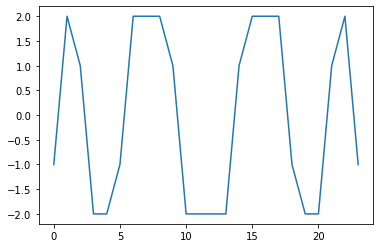

In [11]:
plt.plot(best_solution)